## Modèles SIR simples

### Introduction

Au cours de l'histoire, les épidémies ont profondément influencé l'histoire des sociétés et civilisations.
 De multiples épidémies de grandes ampleures, tels que la peste d'Athènes en 400 après JC, ont été documentées avec beaucoup de précision (évolution du nombre de cas, symptômes, nombre de morts,...). Ces registres étaient probablement utiles pour l'observation de l'évolution des épidémies. Au cours des précédentes décénnies, ces données ont été utiles pour construire, paramétriser et valider des modèles dynamiques d'infection.
En effet, la modélisation est un outil fondamental en épidémiologie. A partir des paramètres biologiques d'un agent infectieux, et/ou d'informations sur l'évolution de cette épidémie, on peut prédire comment celle-ci va évoluer. Mais l'intérêt majeur des modèles est de pouvoir tester numériquement différentes stratégies pour endiguer une maladie. Par exemple, des modèles ont été utilisés pour tenter de déterminer la meilleure politique vaccinale en afrique subsaharienne contre la rougeole (M. Ferrari, Nature 2008). De même, des modèles ont servi à tester l'utilité du confinement sur les dynamiques du COVID-19.
D'après les écrits retrouvés, la 1ere tentative de mise en équation des dynamiques temporelles d'une épidémie date de 1760. C'est Bernoulli qui avait décrit l'influence de l'inoculation de vérole bovine sur la propagation de la petite vérole.

Le modèle le plus classique en épidémiologie est le modèle SIR (Succeptible Infected Recovered) qui considère 3 catégories d'individus:
- S, susceptibles d'être infecté;
- I, infectés par la maladie et pouvant contaminer les S;
- R, plus infectieux et immunisés; 

Dans ce cas, on ne tient pas compte du sexe, de l'âge, de la localisation des individus ou d'autres paramètres environnementaux pouvant faciliter l'infection.
Dans certaines variations du modèle, la catégorie R n'existe pas, (il n'est pas possible d'être immunisé). Il existe également des modèles SIR à catégorie. On y distingue les individus par leur âge par exemple.
Aujourd'hui, des modèles beaucoup plus complexes sont utilisés. Par exemple, le modèle spatial de N. Ferguson (Nature 2005) étudie la propagation d'une épidémie à l'échelle d'une ville. Il tient compte de l'âge des individus, la distance au lieu de travail ou d'étude, la taille du lieu de travail ou d'étude, la taille des ménages, etc. Ce modèle spatialisé nécessite une quantité de données sur les individus très importantes, il est donc très difficile de le paramétriser et impossible de le réutiliser pour une autre ville. 

Il existe donc des modèles qui prennent en compte d'avantage les paramètres démographiques plutôt que de tenir compte des subtilités biologiques de l'agent infectieux.
Il est utile pour étudier une épidémie à l'échelle d'une  grande ville, avec une contagion forte.
A l'inverse, il existe du modèle individu centré. Par exemple pour décrire le SIDA, des modèles décrivent les dynamiques cellulaires (nombre de cellules T saines et infectées,...). On peut aussi les utiliser pour décrire la propagation à l'échelle d'une population car ces paramètres cellulaires influencent l'infectiosité, la léthalité, etc. [Citer nom du modèle]

On étudiera d'abord le modèle SIR simple et l'influence des paramètres, capable de décrire notamment les dynamiques d'épidémie de peste. Puis on s'intéressera à un modèle SIR avec une population non plus constante mais variable. Enfin, on discutera plus en détails des limites de la modélisation dans le cas de l'épidémiologie.

### 1) Modèle à système fermé et population constante

<div style="text-align:center;">
    <img src="https://github.com/LasMatematicas/modelo_SIR/blob/main/SIR_Ncst.JPG?raw=true" alt="Nom de l'image" style="width:50%;"/>
</div>


\begin{equation}
\begin{cases}
\dot{S}= -\frac{β}{N_0}SI \\
\dot{I}=\frac{β}{N_0}SI - gI\\
\dot{R}= gI\\
\ N = S + I + R = N_0
\end{cases}
\end{equation}

- En première approche on pose un modèle SIR considérant l'évolution dans le temps du nombre de potentiels malades (S), d'infectés (I) et de personnes résistantes, immunisées et soignées (R). Ces individus constituent la population totale de taille N


- Dans le premier modèle simple, on suppose le système fermé, la population initiale est constante et déterminée.
Ce modèle est cependant trop simple ne prenant pas en compte l'évolution naturelle de la population (naissances et décès) 
L'importance de la densité d'infectés est ainsi d'autant plus grande dans ce modèle.

Les paramètres seront explicités dans le modèle à population non constante



### 2) Modèle à système ouvert à évolution de la population totale

<div style="text-align:center;">
    <img src="https://github.com/LasMatematicas/modelo_SIR/blob/main/SIR_Nt.JPG?raw=true" alt="Nom de l'image" style="width:50%;"/>
</div>

\begin{equation}
\begin{cases}
\dot{S}=BN - β\frac{SI}{N} -dS\\
\dot{I}=β\frac{SI}{N} - gI - dI - pI\\
\dot{R}=gI - dR\\
\ N(t) = S(t) + I(t) + R(t)
\end{cases}
\end{equation}

- On suppose ensuite que le système est ouvert, le nombre total d'individus N varie en fonction du taux de naissance et du taux de mortalité des individus. 


- Le nombre de personnes susceptibles augmente avec le taux de natalité B au sein de la population totale N. 
Il diminue avec le taux de mortalité naturelle d.
Les individus sains deviennent infectés en fonction de leur densité, de la densité d'individus infectés (favorisant l'infection des susceptibles) et selon le taux de transmission β


- Le nombre d'infectés I évolue donc selon la densité d'infectés, la densité de susceptibles et le même taux de transmission β. 
Les infectés  guérissent et deviennent immunisés selon leur densité et le taux de rétablissement g.
Leur nombre diminue par mort naturelle des individus dépendant de d, ou par mort induite par la maladie selon un taux p.


- Le nombre d'individus résistants évolue uniquement en fonction de la guérison des infectés et de leur propre mort 

### Résolutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Dans le Premier modèle on a : 

\begin{equation}
S + I + R = N_0
\end{equation}

D'où :

\begin{equation}
\dot{S} + \dot{I} + \dot{R} = 0 \\
\Leftrightarrow
\dot{R} = \dot{S} + \dot{I}
\end{equation}

On pose 
\begin{equation} 
\ β_0 = \frac{β}{N_0}
\end{equation}

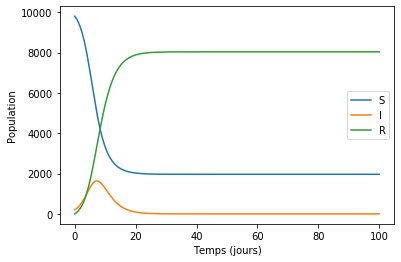

In [4]:
Ns0 = 9800
Ni0 = 200
Nr0 = 0
X0=[Ns0,Ni0,Nr0]

N0=Ns0+Ni0+Nr0
β=1
β0=β/N0
g=0.5

def SIR(X,t):
    S=X[0]
    I=X[1]
    R=X[2]
    ds= -β0*S*I
    di= β0*S*I-g*I
    dr= -ds-di
    return np.array([ds,di,dr])

from scipy.integrate import odeint
t0 = 0
dt = 0.01
tf = 100.
t = np.arange(t0, tf, dt)
Nsir = odeint(SIR,X0,t)
Ns=Nsir[:,0]
Ni=Nsir[:,1]
Nr=Nsir[:,2]

plt.ylabel('Population')
plt.xlabel('Temps (jours)')
plt.plot(t,Ns,label="S")
plt.plot(t,Ni,label="I")
plt.plot(t,Nr,label="R")
plt.legend()
plt.show()

Ce modèle prédit, avec ces paramètres fixés, une disparition de la maladie qui atteint un pic (ici au bout d'une dizaine de jours).

Une part importante de la population est rapidement infectée et devient résistante, mais une certaine part de celle-ci ne rencontre pas la maladie avant sa disparition.

/var/folders/9s/lqq830r928bb1cp4lpbbxp600000gn/T/ipykernel_17321/3942513662.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


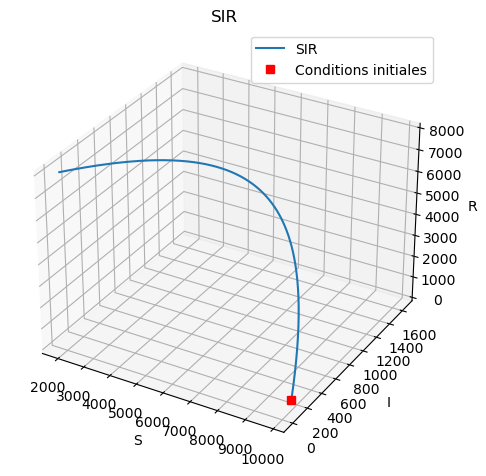

In [73]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(Ns, Ni, Nr, label='SIR')
plt.title("SIR")
ax.set_xlabel('S')
ax.set_ylabel('I')
ax.set_zlabel('R')
plt.tight_layout()

#R = root(SIR,x0=np.array([8000,1,2000]),args=(t))
#print(R.x)

ax.plot(Ns0,Ni0,Nr0,"s",color="r",label="Conditions initiales")
#ax.plot(R.x[0],R.x[1],R.x[2],"s",color="g",label="Point fixe stable")
plt.legend()
plt.show()

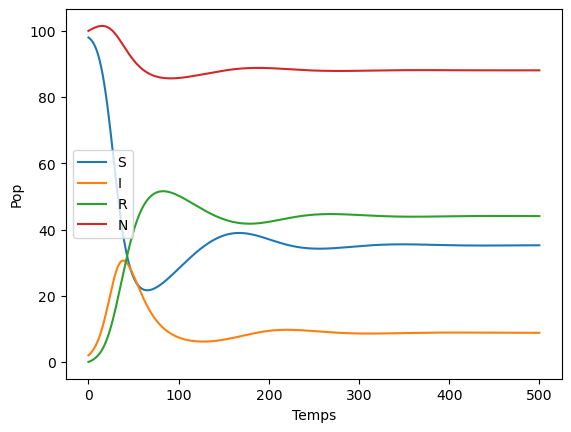

In [6]:
Ns0 = 98
Ni0 = 2
Nr0 = 0
X0=[Ns0,Ni0,Nr0]

g=0.05
β=0.2
B=0.012
d=0.01
p=0.02

def SIR_2(X,t):
    S=X[0]
    I=X[1]
    R=X[2]
    ds= -β*S*I/(S+I+R) - d*S + B*(S+I+R)
    di= β*S*I/(S+I+R) -g*I - d*I - p*I
    dr= g*I - d*R
    return np.array([ds,di,dr])


from scipy.integrate import odeint
t0 = 0
dt = 0.01
tf = 500
t = np.arange(t0, tf, dt)
Nsir = odeint(SIR_2,X0,t)
Ns=Nsir[:,0]
Ni=Nsir[:,1]
Nr=Nsir[:,2]

plt.ylabel('Pop')
plt.xlabel('Temps')
plt.plot(t,Ns,label="S")
plt.plot(t,Ni,label="I")
plt.plot(t,Nr,label="R")
plt.plot(t,Ns+Ni+Nr,label="N")
plt.legend()
plt.show()

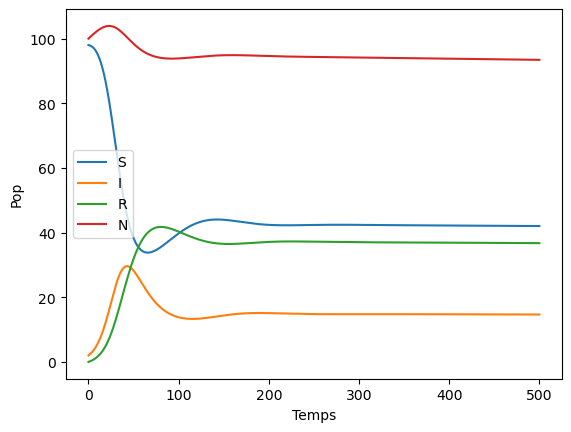

In [10]:
Ns0 = 98
Ni0 = 2
Nr0 = 0
X0=[Ns0,Ni0,Nr0]

g=0.05
β=0.2
B=0.0231
d=0.02
p=0.02

def SIR_2(X,t):
    S=X[0]
    I=X[1]
    R=X[2]
    ds= -β*S*I/(S+I+R) - d*S + B*(S+I+R)
    di= β*S*I/(S+I+R) -g*I - d*I - p*I
    dr= g*I - d*R
    return np.array([ds,di,dr])


from scipy.integrate import odeint
t0 = 0
dt = 0.01
tf = 500
t = np.arange(t0, tf, dt)
Nsir = odeint(SIR_2,X0,t)
Ns=Nsir[:,0]
Ni=Nsir[:,1]
Nr=Nsir[:,2]

plt.ylabel('Pop')
plt.xlabel('Temps')
plt.plot(t,Ns,label="S")
plt.plot(t,Ni,label="I")
plt.plot(t,Nr,label="R")
plt.plot(t,Ns+Ni+Nr,label="N")
plt.legend()
plt.show()

En augmentant le renouvellement de la population, un état stationnaire semble ici être atteint plus vite et semble favoriser le maintien de la maladie à un seuil plus élevé

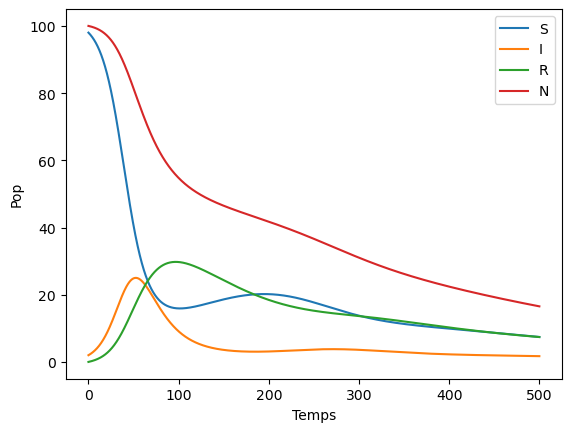

In [36]:
t0 = 0
dt = 0.01
tf = 500
t = np.arange(t0, tf, dt)

g=0.03
β=0.15
B=0.01
d=0.01
p=0.03

Nsir = odeint(SIR_2,X0,t)
Ns=Nsir[:,0]
Ni=Nsir[:,1]
Nr=Nsir[:,2]

plt.ylabel('Pop')
plt.xlabel('Temps')
plt.plot(t,Ns,label="S")
plt.plot(t,Ni,label="I")
plt.plot(t,Nr,label="R")
plt.plot(t,Ns+Ni+Nr,label="N")
plt.legend()
plt.show()

(A dvp) En conditions biologiques : 
- Possible stabilisation du système (Fig 1) = Maladie maintenue à un certain taux
- Si maladie trop infectieuse et mortelle et résistance trop lente (Fig 2) : Fort déclin de la population totale 

/var/folders/9s/lqq830r928bb1cp4lpbbxp600000gn/T/ipykernel_56018/2251406419.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


[-4.59642526e-05 -1.14910631e-05 -5.74553157e-05]


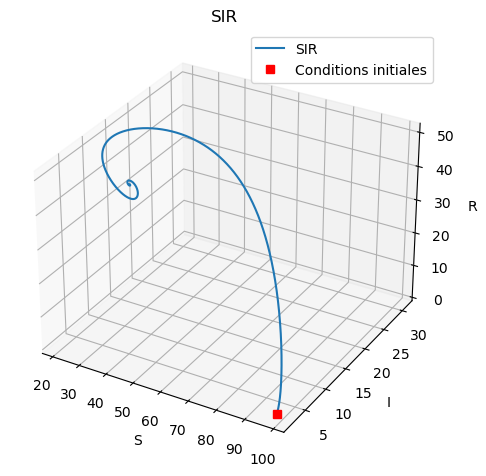

In [41]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(Ns, Ni, Nr, label='SIR')
plt.title("SIR")
ax.set_xlabel('S')
ax.set_ylabel('I')
ax.set_zlabel('R')
plt.tight_layout()

from scipy.optimize import root

#R = root(SIR_2,x0=np.array([50,40,50]),args=(t))
#print(R.x)


ax.plot(Ns0,Ni0,Nr0,"s",color="r",label="Conditions initiales")
#ax.plot(R.x[0],R.x[1],R.x[2],"s",color="g",label="Point fixe stable")
plt.legend()
plt.show()


# Etude des points fixes 

## 1) Modèle SIR simple

\begin{equation}
\begin{cases}
\dot{S}= 0\\
\dot{I}= 0\\
\dot{R}= 0\\
\ N = S + I + R = N_0
\end{cases}
\Leftrightarrow
\begin{cases}
\frac{β}{N_0}SI = 0\\
\frac{β}{N_0}SI - gI = 0\\
\ gI = 0\\
\ S + I + R = N_0
\end{cases}
\Leftrightarrow
\begin{cases}
\ I=0\\
\ S+R=N_0
\end{cases}
\end{equation}

Le modèle SIR simple présente une infinité de points fixes, avec I=0, S entre 0 et N0 et R=N0-S.


### Stabilité des points fixes 

Si S>0 alors dS/dT <=0 et dR>dT >=0. Dès qu'on s'éloigne de l'équilibre (I>0), S diminue et R augmente, l'équilibre est donc instable pour tout S>0, et on atteint un équilibre stable pour S=0 et R=N0. 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


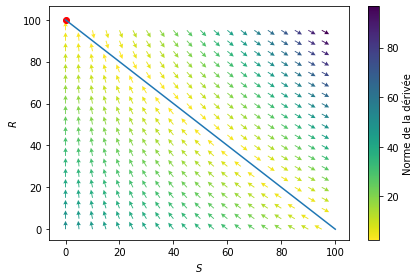

In [39]:
def portrait_de_phase(func, x_min, x_max, step_x, y_min, y_max, step_y, **kwargs):
    
    # On initialise la grille telle qu'on calcule le vecteur de la dérivée en chaque point.
    x_range = np.arange(x_min,x_max,step_x)
    y_range = np.arange(y_min, y_max, step_y)
    x, y = np.meshgrid(x_range, y_range)
    
    # On calcule la dérivée en chaque point.
    dx = func([x,y],0, **kwargs)
    
    # On normalise les vecteurs pour plus de lisibilité. 
    # La norme de la dérivée est montrée par le code couleur.
    dx_norm = lambda i: np.sqrt(dx[0][i]**2 + dx[1][i]**2)
    xx = [dx[0][i]/dx_norm(i) for i in range(len(dx[0]))]
    yy = [dx[1][i]/dx_norm(i) for i in range(len(dx[0]))]
    color = [dx_norm(i) for i in range(len(dx[0]))]
    
    # On affiche les vecteurs sur la grille.
    fig, ax = plt.subplots()
    champ = ax.quiver(x, y, xx, yy, color,headwidth=5, cmap='viridis_r')
    
    cbar=fig.colorbar(champ)
    cbar.set_label('Norme de la dérivée',)
    
    ax.set_xlabel('$S$')
    ax.set_ylabel('$R$')
    
    plt.tight_layout()
    
    return fig, ax

def SIR(X,t,B,N0,g):
    S,R=X
    I=N0-S-R
    dS=-B/N0*S*I
    dR=g*I
    return dS,dR

portrait_de_phase(SIR, 0, 100, 5, 0, 100, 5,B=1,N0=100,g=0.5)

plt.scatter(0,100,color="r")
S=np.linspace(0,100)
R=100-S
plt.plot(S,R)

## 2) Modèle SIR à évolution de la population totale

\begin{equation}
\begin{cases}
\dot{S}=0\\
\dot{I}=0\\
\dot{R}=0
\end{cases}
\Leftrightarrow
\begin{cases}
\ BN - β\frac{SI}{N} -dS = 0\\
\ β\frac{SI}{N} - gI - dI - pI = 0\\
\ gI - dR = 0
\end{cases}
\end{equation}

Deux cas possibles : 

S=0 :
\begin{equation}
\begin{cases}
\ BN = 0\\
\ gI - dI - pI = 0\\
\ gI - dR = 0
\end{cases}
\Leftrightarrow
\begin{cases}
\ N = 0\\
\ I = 0\\
\ R = 0
\end{cases}
\end{equation}

En apparence on a un point fixe pour S=0 ; I=0 ; R=0, qui est cohérent avec notre modèle biologique.
Cependant, la dérivée n'est pas calculable en N=0 (division par 0), ce n'est donc pas réellement un point fixe de notre système mathématique.

S constante non-nulle :

\begin{equation}
\begin{cases}
\ BN - β\frac{kI}{N} -dk = 0\\
\ β\frac{kI}{N} - gI - dI - pI = 0\\
\ gI - dR = 0
\end{cases}
\Leftrightarrow
\begin{cases}
\ BN - β\frac{kI}{N} -dk = 0\\
\ BN - dk - gI - dI - pI = 0\\
\ gI - dR = 0
\end{cases}
\end{equation} 

\begin{equation}
\Leftrightarrow
\begin{cases}
B(1+\mu+\frac{g\mu}{d})S - \frac{\beta}{B}(1+\mu+\frac{g\mu}{d})S - dS = 0 \\
I = \frac{(B-d)S}{g+d+p-B-\frac{g}{d}} = \mu S \\
R = \frac{gI}{d}
\end{cases}
\end{equation}

Si S non-nul, alors : 

\begin{equation}
\Leftrightarrow
\begin{cases}
B(1+\mu+\frac{g\mu}{d}) - \frac{\beta}{B}(1+\mu+\frac{g\mu}{d}) - d = 0 \\
I = \mu S \\
R = \frac{g \mu S}{d}
\end{cases}
\ avec\ \mu = \frac{(B-d)}{g+d+p-B-\frac{g}{d}}
\end{equation}

Pour des paramètres quelconques, il n'y a pas de point fixe du système, le système n'admet un point fixe que pour des paramètres particuliers satisfaisant la première égalité.



### Stabilité du point fixe 

$$
\begin{bmatrix}     B - \beta I \left(\frac{N-S}{N^2}\right) - d & B - \beta S \left(\frac{N-I}{N^2}\right) & B + \beta SI \left(\frac{1}{N^2}\right) \\     \beta I \left(\frac{N-S}{N^2}\right) & \beta S \left(\frac{N-I}{N^2}\right) - g - d - p & -\beta SI \left(\frac{1}{N^2}\right) \\     0 & g & -d 
\end{bmatrix}
$$

